In [1]:
import pandas as pd 
import requests
from bs4 import BeautifulSoup

In [2]:
response = requests.get('https://api.themoviedb.org/3/movie/top_rated?api_key=9f45fe2b44cc37a9e67f65a2f7fc9901&language=en-US&page=1')


In [3]:
temp_df = pd.DataFrame(response.json()['results'])[['id','title','overview','release_date','popularity','vote_average','vote_count']]

In [4]:
temp_df.head(1)

,id,title,overview,release_date,popularity,vote_average,vote_count
0,278,The Shawshank Redemption,Imprisoned in the 1940s for the double murder ...,1994-09-23,25.3318,8.711,29158


In [5]:
df = pd.DataFrame()
df

""


In [3]:
import requests
import pandas as pd
import time

df = pd.DataFrame()

for i in range(1, 525):
    try:
        url = f'https://api.themoviedb.org/3/movie/top_rated?api_key=9f45fe2b44cc37a9e67f65a2f7fc9901&language=en-US&page={i}'
        response = requests.get(url, timeout=10)  # timeout added
        response.raise_for_status()  # will raise error if request failed
        
        data = response.json().get('results', [])
        if not data:
            print(f"No data found on page {i}")
            continue

        temp_df = pd.DataFrame(data)[['id','title','overview','release_date','popularity','vote_average','vote_count']]
        df = pd.concat([df, temp_df], ignore_index=True)
        print(f"✅ Page {i} done")

        time.sleep(1)  # 1 second delay between requests

    except requests.exceptions.RequestException as e:
        print(f"⚠️ Error on page {i}: {e}")
        time.sleep(3)  # wait a bit longer before retrying next page
        continue

print("✅ All pages processed. Total movies:", len(df))


⚠️ Error on page 1: ('Connection aborted.', ConnectionResetError(10054, 'An existing connection was forcibly closed by the remote host', None, 10054, None))
⚠️ Error on page 2: ('Connection aborted.', ConnectionResetError(10054, 'An existing connection was forcibly closed by the remote host', None, 10054, None))
✅ Page 3 done
✅ Page 4 done
⚠️ Error on page 5: ('Connection aborted.', ConnectionResetError(10054, 'An existing connection was forcibly closed by the remote host', None, 10054, None))
⚠️ Error on page 6: ('Connection aborted.', ConnectionResetError(10054, 'An existing connection was forcibly closed by the remote host', None, 10054, None))
⚠️ Error on page 7: ('Connection aborted.', ConnectionResetError(10054, 'An existing connection was forcibly closed by the remote host', None, 10054, None))
⚠️ Error on page 8: ('Connection aborted.', ConnectionResetError(10054, 'An existing connection was forcibly closed by the remote host', None, 10054, None))
⚠️ Error on page 9: ('Connecti

In [5]:
df.to_csv("movies_api.csv")

In [7]:
movies = pd.read_csv("movies_api.csv")
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5600 entries, 0 to 5599
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    5600 non-null   int64  
 1   id            5600 non-null   int64  
 2   title         5600 non-null   object 
 3   overview      5599 non-null   object 
 4   release_date  5599 non-null   object 
 5   popularity    5600 non-null   float64
 6   vote_average  5600 non-null   float64
 7   vote_count    5600 non-null   int64  
dtypes: float64(2), int64(3), object(3)
memory usage: 350.1+ KB


In [8]:
movies.head()

,Unnamed: 0,id,title,overview,release_date,popularity,vote_average,vote_count
0,0,27205,Inception,"Cobb, a skilled thief who commits corporate es...",2010-07-15,20.9107,8.370,38171
1,1,724089,Gabriel's Inferno: Part II,Professor Gabriel Emerson finally learns the t...,2020-07-31,0.9451,8.368,1533
2,2,770156,Lucy Shimmers and the Prince of Peace,Second chances start when a hardened criminal ...,2020-10-19,5.2242,8.400,326
3,3,1058694,Radical,"In a Mexican border town plagued by neglect, c...",2023-10-19,3.5655,8.361,481
4,4,761053,Gabriel's Inferno: Part III,The final part of the film adaption of the ero...,2020-11-19,3.7644,8.359,1069


### Web Scraping

In [4]:
headers={'User-Agent':'Mozilla/5.0 (Windows NT 6.3; Win 64 ; x64) Apple WeKit /537.36(KHTML , like Gecko) Chrome/80.0.3987.162 Safari/537.36'} 
webpage = requests.get("https://www.ambitionbox.com/list-of-companies?campaign=desktop_nav",headers = headers).text

In [5]:
soup = BeautifulSoup(webpage ,'lxml') # syntax

<!DOCTYPE html>
<html data-n-head="%7B%22lang%22:%7B%22ssr%22:%22en%22%7D%7D" data-n-head-ssr="" lang="en">
 <head>
  <meta charset="utf-8"/>
  <meta content="width=device-width,initial-scale=1,minimum-scale=1" name="viewport"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <link href="/assets/next/manifest.json" rel="manifest"/>
  <style>
   @media only screen and (min-width:767px){.trp-img{width:400px!important;max-width:400px!important}}
  </style>
  <script defer="" src="/static/js/env-runtime.js">
  </script>
  <script>
   window.dataLayer=window.dataLayer||[],window.gtag=window.gtag||function(){window.dataLayer.push(arguments)},gtag("js",new Date),window.initialDate=(new Date).toISOString()
  </script>
  <title>
   Top Companies in India | AmbitionBox
  </title>
  <meta content="2025 AmbitionBox" data-n-head="ssr" name="copyright"/>
  <meta content="1 day" data-n-head="ssr" name="revisit-after"/>
  <meta content="AmbitionBox" data-n-head="ssr" name="application-name"
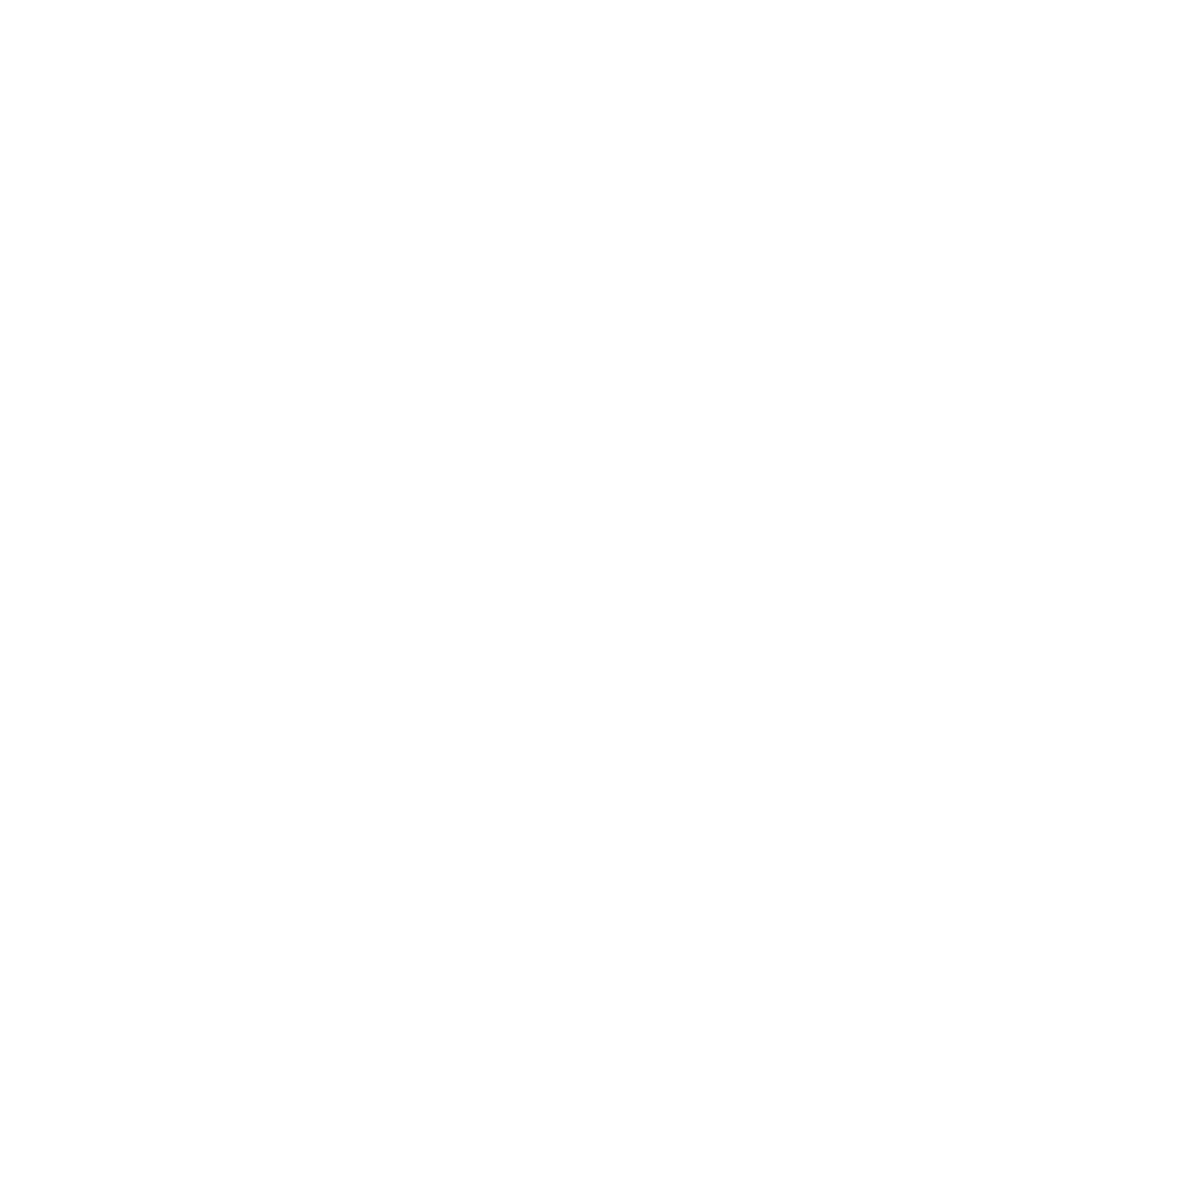

In [6]:
print(soup.prettify()) # this is a function of beautiful soup 

In [7]:
company = soup.find_all('h2')

In [8]:
company

[<h2 class="companyListing__title">
 							Companies in India
 						</h2>,
 <h2 class="companyCardWrapper__companyName" title="TCS">
 									TCS
 								</h2>,
 <h2 class="companyCardWrapper__companyName" title="Accenture">
 									Accenture
 								</h2>,
 <h2 class="companyCardWrapper__companyName" title="Wipro">
 									Wipro
 								</h2>,
 <h2 class="companyCardWrapper__companyName" title="Cognizant">
 									Cognizant
 								</h2>,
 <h2 class="companyCardWrapper__companyName" title="Capgemini">
 									Capgemini
 								</h2>,
 <h2 class="companyCardWrapper__companyName" title="HDFC Bank">
 									HDFC Bank
 								</h2>,
 <h2 class="companyCardWrapper__companyName" title="Infosys">
 									Infosys
 								</h2>,
 <h2 class="companyCardWrapper__companyName" title="ICICI Bank">
 									ICICI Bank
 								</h2>,
 <h2 class="companyCardWrapper__companyName" title="HCLTech">
 									HCLTech
 								</h2>,
 <h2 class="companyCardWrapper__companyName" titl

In [9]:
c = []
for i in company:
    c.append(i.text.strip())
c = c[1:]
c

['TCS',
 'Accenture',
 'Wipro',
 'Cognizant',
 'Capgemini',
 'HDFC Bank',
 'Infosys',
 'ICICI Bank',
 'HCLTech',
 'Tech Mahindra',
 'Genpact',
 'Teleperformance',
 'Axis Bank',
 'Concentrix Corporation',
 'Jio',
 'Amazon',
 'iEnergizer',
 'Reliance Retail',
 'IBM',
 'LTIMindtree']

In [10]:
rating = soup.find_all('div',class_ = 'rating_text rating_text--md')

In [11]:
r = []
for i in rating:
    r.append(i.text.strip())
r

['3.4',
 '3.7',
 '3.7',
 '3.7',
 '3.7',
 '3.8',
 '3.5',
 '4.0',
 '3.4',
 '3.4',
 '3.6',
 '3.8',
 '3.6',
 '3.6',
 '4.3',
 '3.9',
 '4.6',
 '3.9',
 '3.9',
 '3.6']

In [12]:
Highly_rated_for = []
for i in soup.find_all('span',class_ = 'companyCardWrapper__ratingValues'):
    Highly_rated_for.append(i.text.strip())

In [14]:
Highly_rated_for

['Job Security',
 'Promotions / Appraisal, Salary & Benefits, Work Satisfaction',
 'Promotions / Appraisal, Salary & Benefits, Work Satisfaction',
 'Job Security',
 'Promotions / Appraisal, Salary & Benefits, Work Satisfaction',
 'Promotions / Appraisal, Salary & Benefits, Work Satisfaction',
 'Work Life Balance, Job Security',
 'Promotions / Appraisal, Salary & Benefits, Work Satisfaction',
 'Job Security, Skill Development / Learning',
 'Promotions / Appraisal',
 'Job Security',
 'Promotions / Appraisal, Salary & Benefits, Work Satisfaction',
 'Job Security, Skill Development / Learning, Company Culture',
 'Promotions / Appraisal, Salary & Benefits, Work Satisfaction',
 'Promotions / Appraisal, Salary & Benefits, Work Satisfaction',
 'Job Security',
 'Promotions / Appraisal, Salary & Benefits, Work Satisfaction',
 'Promotions / Appraisal, Work Satisfaction, Company Culture',
 'Job Security',
 'Promotions / Appraisal, Salary & Benefits, Work Satisfaction',
 'Job Security, Skill Develo

# You tube video playlist total time 

In [8]:
headers={'User-Agent':'Mozilla/5.0 (Windows NT 6.3; Win 64 ; x64) Apple WeKit /537.36(KHTML , like Gecko) Chrome/80.0.3987.162 Safari/537.36'} 
response = requests.get('https://youtube.com/playlist?list=PLhR2IpV1b2FwWwviBHRrR118YAaSlyhTU&si=MIrOTIq2NJa5fpk6',headers = headers).text

In [9]:
soup = BeautifulSoup(response,'lxml')

In [11]:
print(soup.prettify())

<!DOCTYPE html>
<html darker-dark-theme="" darker-dark-theme-deprecate="" lang="en-GB" style="font-size: 10px;font-family: Roboto, Arial, sans-serif;" system-icons="" typography="" typography-spacing="">
 <head>
  <script data-id="_gd" nonce="AJVCqnWoOSqyA0OjXVWDGQ">
   window.WIZ_global_data = {"AfY8Hf":true,"HiPsbb":0,"MUE6Ne":"youtube_web","MuJWjd":false,"UUFaWc":"%.@.null,1000,2]","cfb2h":"youtube.web-front-end-critical_20251130.10_p0","fPDxwd":[],"hsFLT":"%.@.null,1000,2]","iCzhFc":false,"nQyAE":{},"oxN3nb":{"1":false,"0":false,"610401301":false,"899588437":false,"772657768":true,"513659523":false,"568333945":true,"1331761403":false,"651175828":false,"722764542":false,"748402145":false,"748402146":false,"748402147":true,"824648567":false,"824656860":false,"333098724":false},"u4g7r":"%.@.null,1,2]","vJQk6":false,"xnI9P":true,"xwAfE":true,"yFnxrf":2486};
  </script>
  <meta content="ApvK67ociHgr2egd6c2ZjrfPuRs8BHcvSggogIOPQNH7GJ3cVlyJ1NOq/COCdj0+zxskqHt9HgLLETc8qqD+vwsAAABteyJvcmlna

In [17]:
print(soup.find_all('div',class_ = 'yt-badge-shape__text'))

[]


In [34]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
import time

# URL of playlist
playlist_url = "https://youtube.com/playlist?list=PLhR2IpV1b2FwWwviBHRrR118YAaSlyhTU&si=mYa_y6piw_-hMpno"

driver = webdriver.Chrome()
driver.get(playlist_url)
time.sleep(3)

# Scroll until all videos load
last_height = driver.execute_script("return document.documentElement.scrollHeight")

while True:
    driver.find_element(By.TAG_NAME, "body").send_keys(Keys.END)
    time.sleep(2)

    new_height = driver.execute_script("return document.documentElement.scrollHeight")
    if new_height == last_height:
        break
    last_height = new_height

print("Scrolling complete!")

# Now parse all videos
videos = driver.find_elements(By.CSS_SELECTOR, "div.yt-badge-shape__text")

print(len(videos))  # total count

for v in videos:
    print(v.text)

driver.quit()


Scrolling complete!
233
Course
0:56
36:16
5:28
14:05
6:14
8:32
9:31
8:51
20:28
16:50
27:47
25:03
18:31
16:18
9:06
15:00
20:57
11:18
13:13
17:43
17:53
31:56
29:34
9:49
15:02
5:22
20:05
9:32
22:17
18:14
4:53















22:39
7:24
10:50
16:10
10:24
18:29
12:19
















33:43
33:01
9:42
8:13
15:10
35:58
33:11













9:04
13:05
11:51
8:55
16:22
11:11
45:40
20:08
12:47
18:14
29:03
28:46
30:45













18:39
11:22
10:13
13:53
14:55
8:36
19:24






34:03
21:13
15:24
25:42
29:08
25:23
35:06

25:18
30:40
23:42
17:10
23:13
15:24
6:13

















14:13
7:03
19:09
44:36
16:10
10:31
18:34













22:26
13:00
7:07
7:27
15:22
2:20
16:19






29:40
50:42
9:36
43:44
23:17
32:16
34:41
37:32
6:20
35:40
21:19
36:30











11:46
7:44
6:55
17:12
15:50
13:21
15:18
11:32
10:21
12:33
32:59
20:57
22:08
13:08
69 lessons
13 lessons


In [27]:
time_of_videos = pd.DataFrame(time[1:])

In [30]:
time_of_videos.astype(int)

ValueError: invalid literal for int() with base 10: '0:56'